In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Siddiq\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
file_path ="C:/Users/Siddiq/Downloads/HealthApp_2k.log_structured.csv"

In [6]:
df = pd.read_csv(file_path)

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df['Date'] = df['Time'].dt.date
df['Hour'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.hour

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LineId         2000 non-null   int64         
 1   Time           2000 non-null   datetime64[ns]
 2   Component      2000 non-null   object        
 3   Pid            2000 non-null   int64         
 4   Content        2000 non-null   object        
 5   EventId        2000 non-null   object        
 6   EventTemplate  2000 non-null   object        
 7   Date           2000 non-null   object        
 8   Hour           2000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 140.8+ KB


# Looking for unique values

In [9]:
print("\nUnique Values:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values:
LineId: 2000 unique values
Time: 1711 unique values
Component: 20 unique values
Pid: 1 unique values
Content: 1179 unique values
EventId: 75 unique values
EventTemplate: 75 unique values
Date: 2 unique values
Hour: 4 unique values


# Handling Missing Values

In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
Date             0
Hour             0
dtype: int64


# Exploring Basic Data Analysis

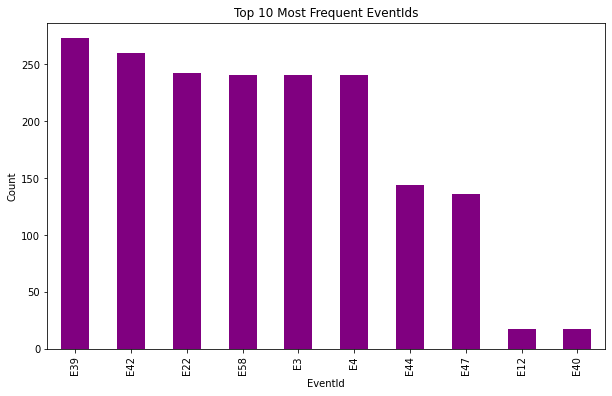

In [55]:
# Explore the most frequent 'EventId'
top_events = df['EventId'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_events.plot(kind='bar', color='purple')
plt.title('Top 10 Most Frequent EventIds')
plt.xlabel('EventId')
plt.ylabel('Count')
plt.show()

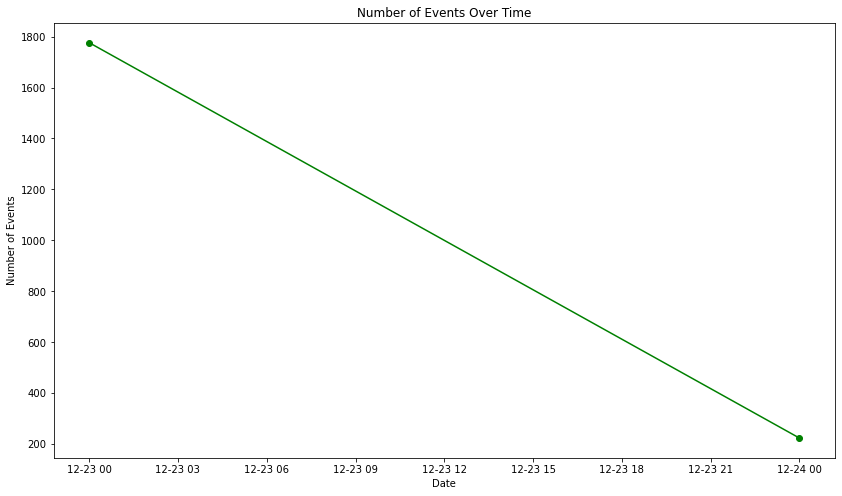

In [57]:
# Explore the trend of events over time
plt.figure(figsize=(14, 8))
df.groupby(df['Time'].dt.date)['LineId'].count().plot(kind='line', marker='o', color='green')
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

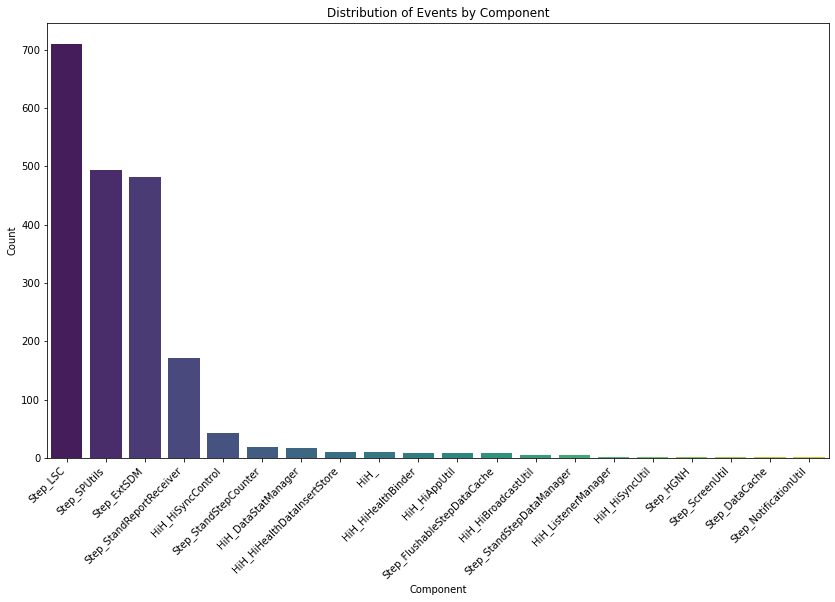

In [58]:
# Explore the distribution of events by component
plt.figure(figsize=(14, 8))
sns.countplot(x='Component', data=df, order=df['Component'].value_counts().index, palette='viridis')
plt.title('Distribution of Events by Component')
plt.xlabel('Component')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

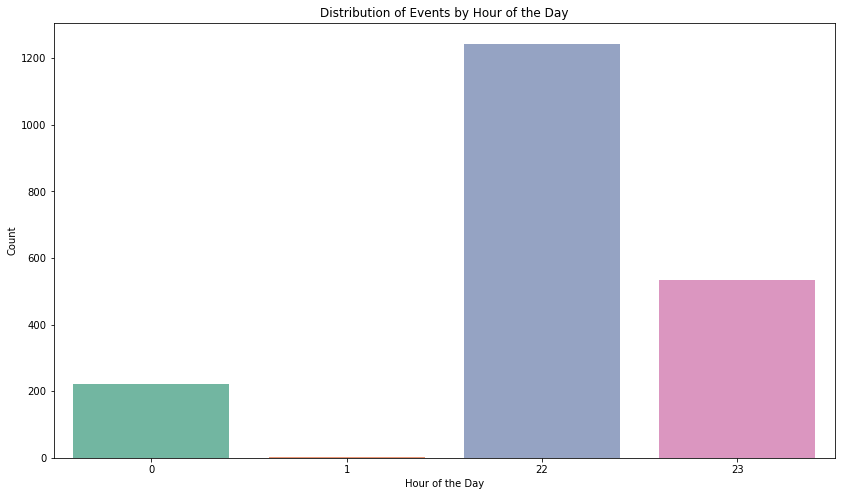

In [59]:
# Explore the distribution of events by hour
plt.figure(figsize=(14, 8))
sns.countplot(x='Hour', data=df, palette='Set2')
plt.title('Distribution of Events by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

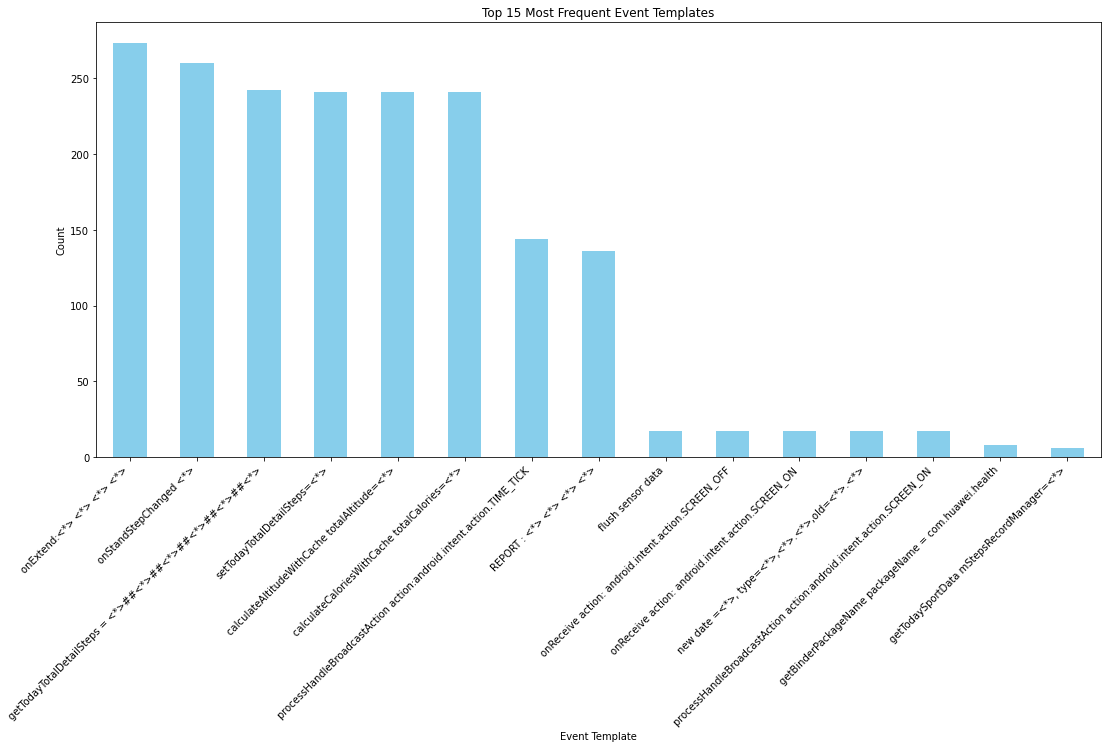

In [71]:
# Explore the distribution of event templates
plt.figure(figsize=(18, 8))
top_event_templates = df['EventTemplate'].value_counts().head(15)
top_event_templates.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Frequent Event Templates')
plt.xlabel('Event Template')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

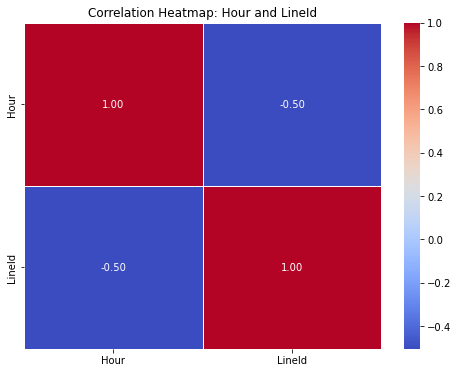

In [63]:
# Explore correlations between numerical columns
correlation_matrix = df[['Hour', 'LineId']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Hour and LineId')
plt.show()

# Exploring events and the Days

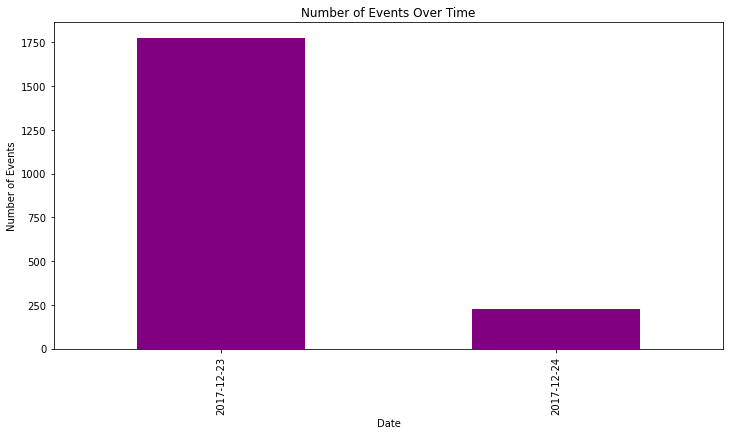

In [13]:
plt.figure(figsize=(12, 6))
df.groupby(df['Time'].dt.date)['LineId'].count().plot(kind='bar', color='purple')
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# A. Fitness Analytics
1. Calorie counts

In [14]:
# Function to extract total calories from the Content column
def extract_total_calories(content):
    try:
        match = re.search(r"totalCalories=(\d+)", content)
        if match:
            return int(match.group(1))
        else:
            return None
    except Exception as e:
        print(f"Error extracting total calories: {e}")
        return None

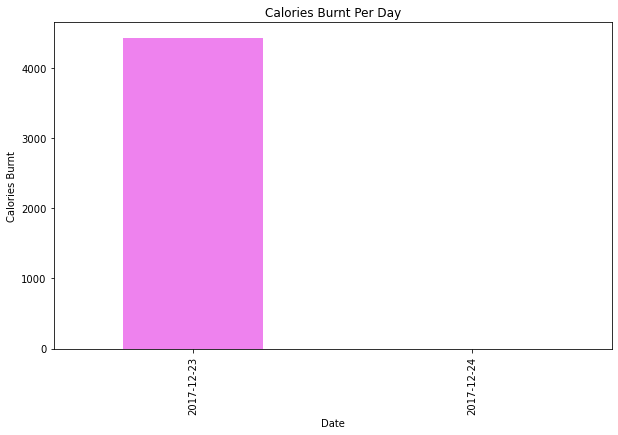

In [68]:
# Filter DataFrame for "E4" events and create a copy
calorie_events = df[df["EventId"] == "E4"].copy()

# Apply the function to extract total calories and convert to float
calorie_events["TotalCalories"] = calorie_events["Content"].apply(extract_total_calories)

# Extract the date from the time column
calorie_events['Date'] = pd.to_datetime(calorie_events['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.date

# Group by date and calculate the difference in total calories for each day
daily_calories = (calorie_events.groupby('Date')['TotalCalories'].max() -
                  calorie_events.groupby('Date')['TotalCalories'].min())
# Plot the bar chart
plt.figure(figsize=(10, 6))
daily_calories.plot(kind='bar', color='violet')
plt.title('Calories Burnt Per Day')
plt.xlabel('Date')
plt.ylabel('Calories Burnt')
calorie_events['Hour12'] = pd.to_datetime(calorie_events['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.strftime('%I %p')
plt.show()



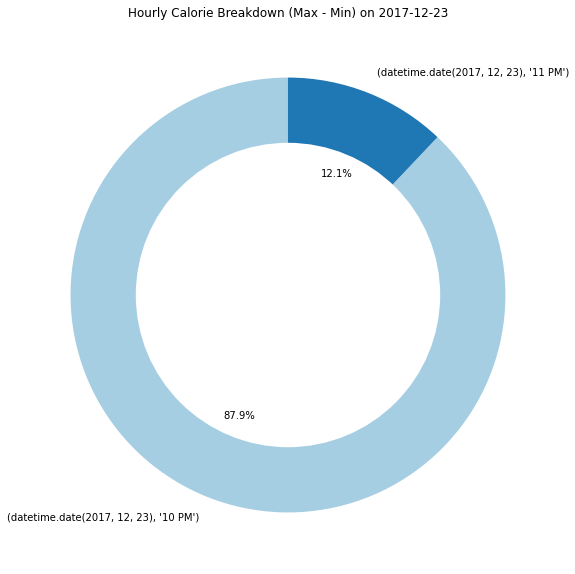

In [16]:
df["TotalCalories"] = df["Content"].apply(extract_total_calories)

# Extract the date and hour from the time column
df['Date'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.date
df['Hour'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.hour

# Filter DataFrame for "E4" events and only for the day (2017-12-23)
calorie_events = df[(df["EventId"] == "E4") & (df['Date'] == pd.to_datetime('2017-12-23').date())].copy()

# Convert the hour to 12-hour format
calorie_events['Hour12'] = pd.to_datetime(calorie_events['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.strftime('%I %p')
# Group by date and 12-hour format and calculate the range (max - min) of total calories for each hour
hourly_calories_range = calorie_events.groupby(['Date', 'Hour12'])['TotalCalories'].apply(lambda x: x.max() - x.min())

# Filter out entries with 0 percent
hourly_calories_range = hourly_calories_range[hourly_calories_range > 0]

# Create a doughnut chart
fig, ax = plt.subplots(figsize=(10, 10))
colors = plt.cm.Paired(range(len(hourly_calories_range)))
ax.pie(hourly_calories_range, labels=hourly_calories_range.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add a circle in the center to create a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Hourly Calorie Breakdown (Max - Min) on 2017-12-23')
plt.show()

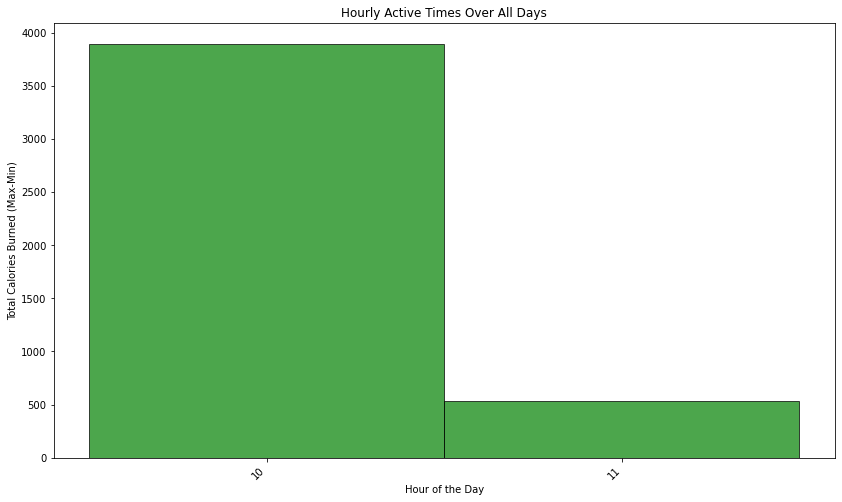

In [65]:
# Convert hours to 12-hour format
calorie_events['Hour12'] = calorie_events['Hour'] % 12
calorie_events['Hour12'] = calorie_events['Hour12'].replace(0, 12)  # Replace 0 with 12 for 12 AM

# Calculate max-min for each hour
hourly_calories_range = calorie_events.groupby(['Date', 'Hour12'])['TotalCalories'].agg(['min', 'max'])

# Create a new DataFrame for hourly ranges
hourly_calories_range = hourly_calories_range.reset_index()

# Filter out unnecessary ranges (e.g., 0-1AM, 11PM-12AM)
hourly_calories_range = hourly_calories_range[~hourly_calories_range.Hour12.isin(['0AM-1AM', '11PM-12AM'])]

# Adjust labels for overlapping hours (e.g., 10PM-11PM)
hourly_calories_range.loc[hourly_calories_range['Hour12'] == '10PM', 'Hour12'] = '10PM-11PM'

# Set the starting position for each bar
start_positions = np.arange(len(hourly_calories_range))
bar_width = 1 # Each hour has 60 minutes

# Plot the histogram with rectangles covering the whole hour
plt.figure(figsize=(14, 8))
plt.bar(start_positions, hourly_calories_range['max'] - hourly_calories_range['min'],
        color='green', edgecolor='black', alpha=0.7, width=bar_width)

plt.title('Hourly Active Times Over All Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Calories Burned (Max-Min)')

# Set the x-axis ticks and labels
plt.xticks(start_positions, hourly_calories_range['Hour12'], rotation=45, ha='right')

plt.show()

In [18]:
hourly_calories_range

,Date,Hour12,min,max
0,2017-12-23,10,126775.0,130673.0
1,2017-12-23,11,130673.0,131208.0


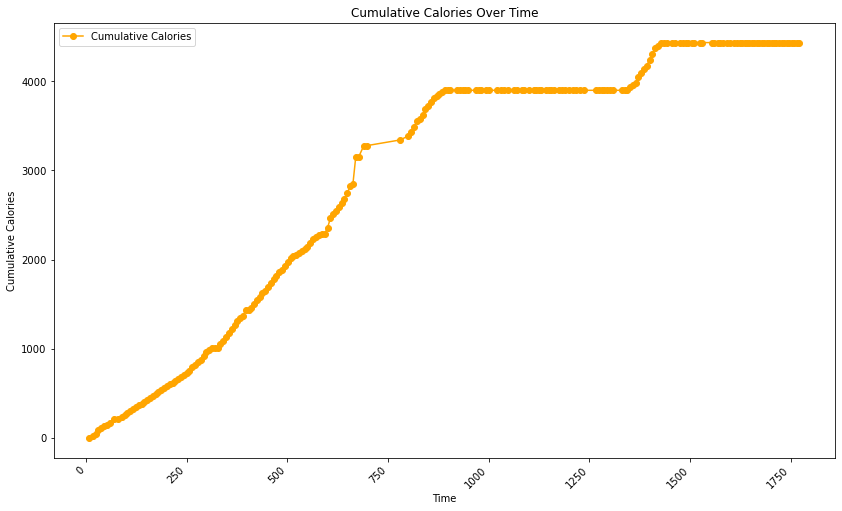

In [64]:
# Group by date and calculate the cumulative calories for each timestamp
cumulative_calories = calorie_events.groupby('Time')['TotalCalories'].cumsum()

cumulative_calories -= cumulative_calories.min()
# Plot the line chart
plt.figure(figsize=(14, 8))
plt.plot(cumulative_calories.index, cumulative_calories.values, label='Cumulative Calories', color='orange', marker='o')
plt.title('Cumulative Calories Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Calories')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# 2. Step Counts

In [31]:
# Function to extract step count from the Content column
def extract_step_count(content):
    try:
        match = re.search(r"stepCount=(\d+)", content)
        if match:
            return int(match.group(1))
        else:
            return None
    except Exception as e:
        print(f"Error extracting step count: {e}")
        return None

In [34]:
# Create lists to store event data for plotting
event_types = []
event_times = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    event_id = row['EventId']
    event_time = row['Time']
    
    # Check if the event is a screen on event
    if event_id == 'E41':
        screen_state = 'on'
        screen_on_time = event_time
    # Check if the event is a screen off event
    elif event_id == 'E40':
        if screen_state == 'on':
            screen_off_time = event_time
            screen_state = 'off'
            
            # Store screen on and off events for plotting
            event_types.extend(['Screen On', 'Screen Off'])
            event_times.extend([screen_on_time, screen_off_time])

# Create the screen_events_df DataFrame
screen_events_df = pd.DataFrame({'Timestamp': event_times, 'Status': event_types})

# Sort the DataFrame by timestamp
screen_events_df = screen_events_df.sort_values(by='Timestamp').reset_index(drop=True)


In [35]:
# Assuming you have DataFrames 'df' and 'screen_events_df'
merged_df = pd.merge(df, screen_events_df, how='left', left_on='Time', right_on='Timestamp')


In [50]:
if 'df' in locals() and not df.empty:
    step_events = df[df['EventId'] == 'E22'].copy()

    step_events['StepCount'] = step_events['Content'].apply(extract_step_count)

    step_events['Date'] = pd.to_datetime(step_events['Time']).dt.date
    step_events['Hour12'] = pd.to_datetime(step_events['Time']).dt.strftime('%I %p')
    step_events['Hour'] = pd.to_datetime(step_events['Time']).dt.hour

    # Select a specific date for analysis
    selected_date = '2017-12-23'
    
    # Calculate hourly step count as max - min for log data
    hourly_step_count = (
        step_events[step_events['Date'] == pd.to_datetime(selected_date).date()]
        .groupby(['Hour12', 'Hour'])['StepCount']
        .apply(lambda x: x.max() - x.min())
    )

 

In [51]:
import matplotlib.pyplot as plt


step_events['Time'] = pd.to_datetime(step_events['Time'])

unique_dates = step_events['Date'].unique()

for date in unique_dates:
    # Filter data for the current date
    daily_data = step_events[step_events['Date'] == pd.to_datetime(date).date()]
    
    # Subtract the minimum step count to handle zero errors
    daily_data.loc[:, 'AdjustedSteps'] = daily_data['StepCount'] - daily_data['StepCount'].min()

    # Filter data up to 24:00:00
    daily_data = daily_data[daily_data['Time'] <= pd.to_datetime(str(date) + ' 23:59:59')]

  

C:\Users\Siddiq\AppData\Local\Temp\ipykernel_15316\2229674785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.loc[:, 'AdjustedSteps'] = daily_data['StepCount'] - daily_data['StepCount'].min()
C:\Users\Siddiq\AppData\Local\Temp\ipykernel_15316\2229674785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.loc[:, 'AdjustedSteps'] = daily_data['StepCount'] - daily_data['StepCount'].min()


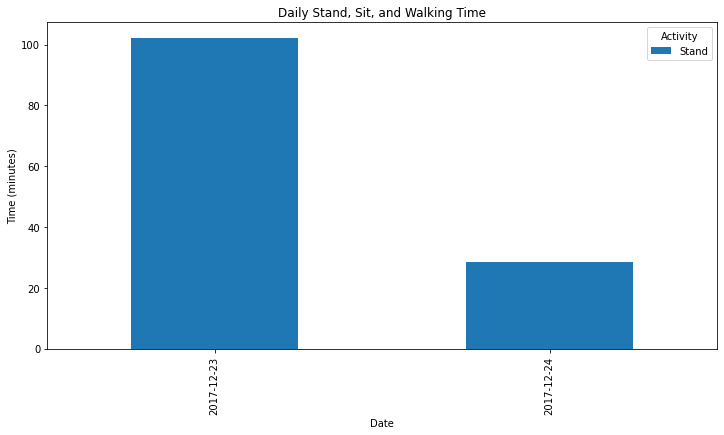

In [39]:
# Function to categorize events
def categorize_activity(content):
    if "onStandStepChanged" in content:
        return "Stand"
    elif "onSitStepChanged" in content:
        return "Sit"
    elif "onWalkingStepChanged" in content:
        return "Walking"
    else:
        return None

# Apply the function to create a new column 'Activity'
df['Activity'] = df['EventTemplate'].apply(categorize_activity)

# Convert 'Time' to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Group by date and activity, then calculate the total time spent on each activity
activity_time = df.groupby(['Date', 'Activity'])['Time'].agg(lambda x: (x.max() - x.min()).total_seconds() / 60)
# Unstack to reshape the data for better visualization
activity_time = activity_time.unstack()

# Plot the bar chart
activity_time.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Daily Stand, Sit, and Walking Time')
plt.xlabel('Date')
plt.ylabel('Time (minutes)')
plt.legend(title='Activity', loc='upper right')
plt.show()

# 3.Screen Time Analyisis

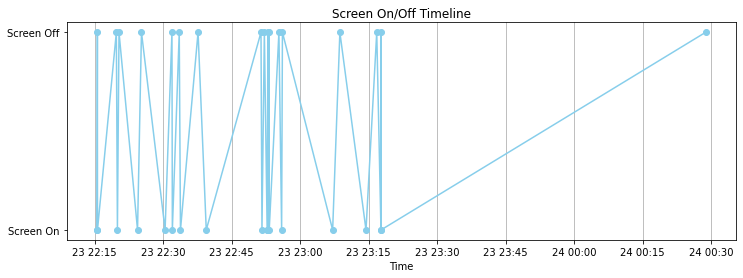

Time spent on the app: 71.12 minutes
Total screen on time: 2017-12-23 23:17:41.987000
Total screen off time: 0 days 00:33:46.826000


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize variables
screen_on_time = pd.Timestamp.min
screen_off_time = pd.Timestamp.min
screen_state = 'off'

# Create lists to store event data for plotting
event_types = []
event_times = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    event_id = row['EventId']
    event_time = row['Time']
    
    # Check if the event is a screen on event
    if event_id == 'E41':
        screen_state = 'on'
        screen_on_time = event_time
    # Check if the event is a screen off event
    elif event_id == 'E40':
         if screen_state == 'on':
            screen_off_time = event_time
            screen_state = 'off'
            
            # Store screen on and off events for plotting
            event_types.extend(['Screen On', 'Screen Off'])
            event_times.extend([screen_on_time, screen_off_time])

# Sort the events by time
sorted_events = sorted(zip(event_times, event_types))

# Extract sorted event times and types
sorted_times, sorted_types = zip(*sorted_events)

# Plot the timeline
plt.figure(figsize=(12, 4))
plt.plot(sorted_times, sorted_types, marker='o',linestyle='-', color='skyblue')
plt.title('Screen On/Off Timeline')
plt.xlabel('Time')
plt.yticks(['Screen On', 'Screen Off'])
plt.grid(axis='x')
# Display time spent on the app
time_spent_on_app = (screen_off_time - screen_on_time).total_seconds() / 60  # Convert to minutes
plt.show()

# Optionally, you can display the total screen on and off times
print(f'Time spent on the app: {time_spent_on_app:.2f} minutes')
print(f'Total screen on time: {screen_on_time}')
print(f'Total screen off time: {df["Time"].max() - screen_off_time}')

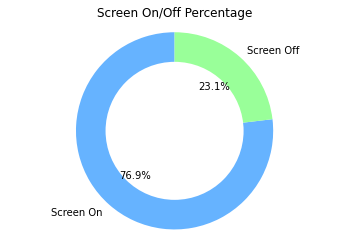

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your provided list of tuples
screen_events_df = pd.DataFrame(sorted_events, columns=['Timestamp', 'Status'])

# Calculate the duration of each status
screen_events_df['Duration'] = screen_events_df['Timestamp'].diff().shift(-1).fillna(pd.Timedelta(seconds=0))
on_duration = screen_events_df[screen_events_df['Status'] == 'Screen On']['Duration'].sum()
off_duration = screen_events_df[screen_events_df['Status'] == 'Screen Off']['Duration'].sum()

# Calculate percentages
total_duration = on_duration + off_duration
on_percentage = (on_duration / total_duration) * 100
off_percentage = (off_duration / total_duration) * 100
# Create a doughnut chart
labels = ['Screen On', 'Screen Off']
sizes = [on_percentage, off_percentage]
colors = ['#66b3ff', '#99ff99']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a circle in the center to create a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Screen On/Off Percentage')
plt.show()

In [45]:
print(merged_df.columns)


Index(['LineId', 'Time', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate', 'Date', 'Hour', 'TotalCalories', 'Timestamp',
       'Status'],
      dtype='object')


In [46]:
print(merged_df.head())


   LineId                    Time                 Component       Pid  \
0       1 2017-12-23 22:15:29.606                  Step_LSC  30002312   
1       2 2017-12-23 22:15:29.615                  Step_LSC  30002312   
2       3 2017-12-23 22:15:29.633  Step_StandReportReceiver  30002312   
3       4 2017-12-23 22:15:29.635                  Step_LSC  30002312   
4       5 2017-12-23 22:15:29.635     Step_StandStepCounter  30002312   

                                             Content EventId  \
0                            onStandStepChanged 3579     E42   
1                      onExtend:1514038530000 14 0 4     E39   
2  onReceive action: android.intent.action.SCREEN_ON     E41   
3  processHandleBroadcastAction action:android.in...     E43   
4                                  flush sensor data     E12   

                                       EventTemplate        Date  Hour  \
0                             onStandStepChanged <*>  2017-12-23    22   
1                           

In [48]:
# Assuming you have DataFrames 'df' and 'screen_events_df'
merged_df = pd.merge(df, screen_events_df, how='left', left_on='Time', right_on='Timestamp')

# Check the column names in the merged DataFrame
print(merged_df.columns)

# Ensure that the columns exist before using them
if 'StepCount' in merged_df.columns:
    # Adjust column names as needed
    merged_df['Steps_Walked'] = merged_df['StepCount'].diff().fillna(0)
else:
    print("Column 'StepCount' not found in merged DataFrame.")

if 'Duration' in merged_df.columns:
    merged_df['Screee_Duration'] = merged_df['Duration'].dt.total_seconds()
else:
    print("Column 'Duration' not found in merged DataFrame.")


Index(['LineId', 'Time', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate', 'Date', 'Hour', 'TotalCalories', 'Activity',
       'Timestamp', 'Status', 'Duration'],
      dtype='object')
Column 'StepCount' not found in merged DataFrame.


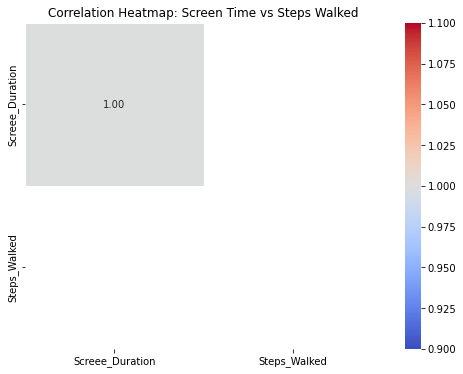

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

merged_df['Steps_Walked'] = merged_df['Pid'].diff().fillna(0)

merged_df['Screee_Duration'] = merged_df['Duration'].dt.total_seconds()

import seaborn as sns

correlation_matrix = merged_df[['Screee_Duration', 'Steps_Walked']].corr()

# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Screen Time vs Steps Walked')
plt.show()

# Correlation

A small Negative correlation is seen betwene steps walked and screen time suggesting that the user walks with the screen off This makes sense as most users do not prefer walking while scrolling on their phone at the same time